# Theoretical gravitropic sensitivity from the model for different value of gravity intensity $g_{eff}$

### Load python modules

In [1]:
%matplotlib inline
#%matplotlib auto
from pylab import *
import pandas as pd
import scipy.io
from scipy.optimize import curve_fit
from scipy import integrate

## Resolve the model equations in *calculevolution function*

In [2]:
#=========================================================================
#Computation of the equations describing the model

def calculevolution(Ainit,tincl,tauaval,tauretard,taudose,beta,L,DLdt, tfin=250, dt=0.2):

    R=0.8 #Plant radius
    
    ntfin=int(tfin/dt)
    ntincl=int(tincl/dt)
    nstep=500 #Number of point on the curvilinear axes (along the stem)
    ds=L/nstep
    ntretard=int(tauretard/dt)

    ntsortie=1  #how many time we record the output 
    
    doteps = DLdt / L
    
    Bdt=dt*doteps/R*beta


    #=========================================================================
    #Init data tables in memory
    
    Ainit=Ainit*pi/180.0
    Atot=zeros((ntfin+1,nstep+1))
    Astatotot=zeros((ntfin+1,nstep+1))
    Ctot=zeros((ntfin+1,nstep+1))
    Sdosetot=zeros((ntfin+1,nstep+1))
    Pdosetot=Sdosetot=zeros((ntfin+1,nstep+1))
    Xtot=zeros((ntfin+1,nstep+1))
    Ytot=zeros((ntfin+1,nstep+1))

    Atige=ones(nstep+1)*Ainit
    Astato=zeros(nstep+1)
    Sdose=zeros(nstep+1)
    Pdose=zeros(nstep+1)
    Astatoretard=zeros((ntretard+1,nstep+1))
    Cretard=zeros((ntretard+1,nstep+1))
    C=zeros(nstep+1)
    Abas=zeros(ntfin+1)
    Abas[0:ntincl]=Ainit*ones(ntincl)
    
    
    #=========================================================================
    #Compute the 4 differential equation of the model 
    integra = integrate.cumtrapz
    for it in range(ntfin+1):
        Atigeold=Atige[:]
        Atige=r_[Abas[it],Abas[it]+ds*integra(C)]
        dAstato=-dt/tauaval*sin(Astato-Atige)
        #dAstato=Astato-Atige
        dSdose=-dt/taudose*(Sdose-sin(Astatoretard[0]))
        dPdose=-dt/taudose*(Pdose-Cretard[0])
        dC=-Bdt*Sdose
        Astato=Astato+dAstato
        Sdose=Sdose+dSdose
        Pdose=Pdose+dPdose
        C=C+dC
        Astatoretard[0:-1,:]=Astatoretard[1:,:]
        Astatoretard[-1,:]=Astato
        Cretard[0:-1,:]=Cretard[1:,:]
        Cretard[-1,:]=C
        
        if it%ntsortie==0:
            Atot[it,:]=Atige-Ainit*(it<=ntincl-1)
            Astatotot[it,:]=Astato
            Ctot[it,:]=C
            Sdosetot[it,:]=Sdose
            dX=ds*sin(Atige)
            dY=ds*cos(Atige)
            X=r_[0,integra(dX)]
            Y=r_[0,integra(dY)]
            Xtot[it,:]=X;
            Ytot[it,:]=Y;
            
    ttot=dt*arange(ntfin+1)
    #end for =========================================================================
    return [ttot,Atot*180.0/pi,Astatotot*180.0/pi,Sdosetot,Xtot,Ytot]

#Compute the maximum slope of the curve
def maxdepente(X, dt=0.2):
    dXdt=diff(X)/dt
    return max(dXdt)

### Constants for wheat coleoptiles

In [8]:
R = 0.8 #Shoot radius 
Ainit = -45.0 #Angle of inclination during the transient stimulus 
tauaval = 1.04 #Avalanche time scale
taureaction = 13.0 #Reaction time scale
taumemory = 13.0 #Memory time scale
taudose = 13.0 #duration of the inclination

beta=0.8 #Gravitropic sensitivity
L=20.0 #Shoot size
DLdt=0.0167 #Shoot growth rate
dti = 0.1 #integration step

### Run the model function for different $\tau_{aval}$ (i.e different $g$) and an inclination time of $tincl=5$ minute

In [9]:
tmax=160.
allg = logspace(-3,1.8,40)

all_response2 = zeros( (len(allg)) )
tincl = 5
tavals = 1.04/allg

for i, g in enumerate(allg):
    tauaval=1.04/g
    
    if g > 10:
        dti = 0.03
        
    #if g > 50:
    #    dti = 0.01
        
    print(tauaval/taudose, g)
    #print('Dt = %f'%tincl)
    [ttot,Atot,Astatotot,Sdosetot,Xtot,Ytot]=calculevolution(Ainit,tincl,tauaval,
                                                             taureaction,taumemory,
                                                             beta,L,DLdt,tfin=tmax, dt=dti)
    AA=array(Atot[:,-1])
    dAdt=maxdepente(AA, dt=dti)
    reponse=dAdt/180.0*pi*R/DLdt/sin(-Ainit/180.0*pi)

    all_response2[i] = reponse.copy()

(80.0, 0.001)
(60.25777118068992, 0.0013276295892211266)
(45.38748734580481, 0.0017626003261754578)
(34.18686033687456, 0.002340080347001347)
(25.750300094569887, 0.00310675990983383)
(19.39569613665863, 0.004124626382901352)
(14.609267746162088, 0.005475976030421944)
(11.004023912070855, 0.007270067807853822)
(8.288474437005075, 0.009651957137350706)
(6.243062450775621, 0.012814223889440833)
(4.702412857819932, 0.017012542798525883)
(3.541961474795595, 0.022586355207213756)
(2.66788380098815, 0.029986313485755655)
(2.009509145207665, 0.03981071705534971)
(1.5136067782178404, 0.052853885930792446)
(1.1400821362423987, 0.07017038286703826)
(0.8587351061610827, 0.0931602765812552)
(0.6468182941485001, 0.12368233972929832)
(0.4871978595535563, 0.16420433388871616)
(0.3669682142587512, 0.218002532349005)
(0.27640858356737774, 0.2894266124716749)
(0.20819706476227068, 0.384251334625432)
(0.15681863861170234, 0.510143441546432)
(0.1181192705291408, 0.6772815277441413)
(0.08897004969468719, 0

## Plot the gravitropic sensitivity $\tilde{\beta}$ as a function of $\tau_{aval}$

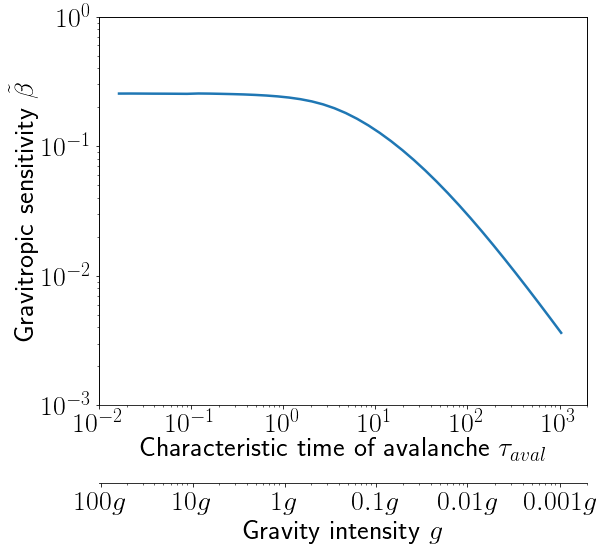

In [10]:
mpl.rcParams['font.size'] = 28
mpl.rcParams['text.usetex'] =True
mpl.rcParams['figure.figsize']=[9,4]

fig = figure('beta-g', figsize=(9,8.5))
loglog(tavals[:], all_response2[:],lw=2.5)

ax1 = gca()
ylim(1e-3,1)
yticks([1e-3,1e-2,1e-1,1])


xlabel(r'Characteristic time of avalanche $\tau_{aval}$')
ylabel(r'Gravitropic sensitivity $\tilde{\beta}$')


xlim(1e-2,2e3)

ax2 = ax1.twiny()
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis 
ax2.spines["bottom"].set_position(("axes", -0.2))


ax2.set_xlim(ax1.get_xlim())
ax2.set_xscale('log')
ax2.set_xticks([0.0104,0.104,1.04,10.04,100.04,1000.04])
ax2.set_xticklabels(['$100g$','$10g$','$1g$','$0.1g$','$0.01g$','$0.001g$'])
ax2.set_xlabel('Gravity intensity $g$')


tight_layout()